In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats
import pickle
import copy
import random 
np.set_printoptions(suppress=True)
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score

In [3]:
PATH = 'D:/iat/pickle/'
# Load data chunks

CompleteFrame = pd.DataFrame()
for stimulus in [True, False]:
    Frame = pd.DataFrame()
    datasets = os.listdir(PATH+str(stimulus)+"/")
    for dataset in datasets:
        pickles = pickle.load(open(PATH +str(stimulus)+"/" +str(dataset), "rb" ))
        raw_data = pickles['data_array']
        #compute accuracy rate
        accuracy = (np.sum(raw_data[:,:,0]>0, axis=1) / np.sum((raw_data[:,:,0]>0)|(raw_data[:,:,0]<0) , axis=1))
        
        # compute mean correct and error rts for the congruent and incongruent experimental conditions
        correct_rts = copy.copy(raw_data[:,:,:])
        correct_rts[correct_rts[:,:,0]<=0] = np.nan
        
        error_rts = copy.copy(raw_data[:,:,:])
        error_rts[error_rts[:,:,0]>=0] = np.nan
        
        correct_rts_congruent = copy.copy(raw_data[:,:,:])
        correct_rts_congruent[correct_rts_congruent[:,:,1]==0] = np.nan
        correct_rts_congruent[correct_rts_congruent[:,:,0]<=0] = np.nan
        
        correct_rts_incongruent = copy.copy(raw_data[:,:,:])
        correct_rts_incongruent[correct_rts_incongruent[:,:,1]==1] = np.nan
        correct_rts_incongruent[correct_rts_incongruent[:,:,0]<=0] = np.nan
        
        error_rts_congruent = copy.copy(raw_data[:,:,:])
        error_rts_congruent[error_rts_congruent[:,:,1]==0] = np.nan
        error_rts_congruent[error_rts_congruent[:,:,0]>=0] = np.nan
        
        error_rts_incongruent = copy.copy(raw_data[:,:,:])
        error_rts_incongruent[error_rts_incongruent[:,:,1]==1] = np.nan
        error_rts_incongruent[error_rts_incongruent[:,:,0]>=0] = np.nan

        meanrt_correct_congruent = np.nanmean(correct_rts_congruent[:,:,0],axis=1)
        meanrt_correct_incongruent = np.nanmean(correct_rts_incongruent[:,:,0],axis=1)

        meanrt_error_congruent = np.nanmean(error_rts_congruent[:,:,0],axis=1)
        meanrt_error_incongruent = np.nanmean(error_rts_incongruent[:,:,0],axis=1)

        # compute correct and error rt quartiles
        emp_q75_c = np.nanquantile(correct_rts, 0.75, axis=1)
        emp_q50_c = np.nanquantile(correct_rts, 0.5, axis=1)
        emp_q25_c = np.nanquantile(correct_rts, 0.25, axis=1)
        
        emp_q75_e = np.nanquantile(np.abs(error_rts), 0.75, axis=1)
        emp_q50_e = np.nanquantile(np.abs(error_rts), 0.5, axis=1)
        emp_q25_e = np.nanquantile(np.abs(error_rts), 0.25, axis=1)
        
        #combine data
        
        rt_summaries = np.column_stack((meanrt_correct_congruent, meanrt_correct_incongruent,
                                        meanrt_error_congruent, meanrt_error_incongruent, emp_q25_c,emp_q50_c,emp_q75_c,emp_q25_e,emp_q50_e,emp_q75_e, accuracy))
        df_oneset = np.concatenate((pickles['est_array'],pickles['outcome_array'],rt_summaries), axis=1)  
        Frame = Frame.append(pd.DataFrame(data = df_oneset), ignore_index=True)
        Frame ['stimulus'] = stimulus
        
    CompleteFrame = CompleteFrame.append(Frame, ignore_index=True)
    

# give variables interpretable names
df = CompleteFrame.rename(columns={0: "v1", 1: "v2", 2: "a1", 3: "a2", 4: "tplus",
                           5: "tminus", 45: "session_id", 46:"agex",
                                   47: "Mn_RT_correct_congruent",48: "Mn_RT__correct_incongruent", 63:'Accuracy'})

df.shape

C:\Users\User1\miniconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice
C:\Users\User1\miniconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: Mean of empty slice
C:\Users\User1\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


(1186608, 65)

In [5]:
df = df[df['agex']<81] # use only up to age 80
df.shape

(1185882, 65)

In [4]:
# Load demographics (change to whatever the data is)
outcomes = pd.read_csv('D:/iat/outcomes/outcomes_afterwards.csv')
df = pd.merge(df, outcomes, how='left',on='session_id')

In [8]:
#save csv
df.to_csv("d:/iat/final_iat.csv", index=False) # write df as csv

In [6]:
# read csv if needed
df = pd.read_csv("d:/iat/final_iat.csv")

In [7]:
print(df.shape)

(1185882, 73)


In [6]:
df.head()

,v1,v2,a1,a2,tplus,tminus,6,7,8,9,...,Accuracy,stimulus,age,birthsex,raceomb_002,Mn_RT_all_3467,edu,politicalid_7,religionid,countrycit_num
0,1.368002,2.444254,2.065458,2.438723,0.318620,1.274719,1.373418,2.438982,2.054801,2.404231,...,0.97500,True,21,2.0,6.0,937.191667,6.0,7.0,1.0,1.0
1,1.736750,2.533051,1.258957,1.268246,0.440695,1.018225,1.732622,2.524861,1.256909,1.249434,...,0.92500,True,51,1.0,6.0,758.725000,7.0,4.0,2.0,1.0
2,1.208634,2.495442,1.124924,1.064379,0.363593,0.802901,1.211832,2.492607,1.119557,1.056030,...,0.85000,True,21,1.0,6.0,661.183333,5.0,2.0,4.0,1.0
3,1.175065,2.375113,1.869280,1.723974,0.259389,2.181388,1.171288,2.378581,1.862460,1.699919,...,0.92437,True,21,2.0,6.0,913.333333,5.0,4.0,3.0,1.0
4,1.368112,1.416175,2.293509,1.543404,0.433872,1.259282,1.373046,1.417729,2.276530,1.533004,...,0.92500,True,23,1.0,8.0,1123.608333,7.0,6.0,1.0,1.0


In [11]:
df.describe()

,v1,v2,a1,a2,tplus,tminus,6,7,8,9,...,62,Accuracy,age,birthsex,raceomb_002,Mn_RT_all_3467,edu,politicalid_7,religionid,countrycit_num
count,1.185882e+06,1.185882e+06,1.185882e+06,1.185882e+06,1.185882e+06,1.185882e+06,1.185882e+06,1.185882e+06,1.185882e+06,1.185882e+06,...,1.182026e+06,1.185882e+06,1.185882e+06,1.183117e+06,1.095759e+06,1.184725e+06,1.145807e+06,925249.000000,1.167647e+06,1.168184e+06
mean,1.576526e+00,2.099536e+00,1.911438e+00,1.830067e+00,3.825079e-01,1.290087e+00,1.576690e+00,2.096527e+00,1.899930e+00,1.811623e+00,...,5.958323e-01,9.340441e-01,2.741605e+01,1.613016e+00,5.793390e+00,1.044667e+03,5.990418e+00,4.730909,2.080442e+00,2.156783e+01
std,6.390547e-01,8.588439e-01,5.122369e-01,5.288904e-01,7.344006e-02,8.422936e-01,6.395113e-01,8.579348e-01,5.098681e-01,5.275952e-01,...,4.498320e-01,5.527986e-02,1.233236e+01,4.870601e-01,1.207181e+00,3.657693e+03,2.510768e+00,1.659446,1.002076e+00,5.653123e+01
min,1.000131e-01,1.014618e-01,2.423611e-01,4.576966e-01,1.000385e-01,1.008090e-01,8.905803e-02,9.940077e-02,2.389790e-01,4.557827e-01,...,0.000000e+00,5.042017e-01,1.000000e+01,1.000000e+00,1.000000e+00,3.523583e+02,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
25%,1.136959e+00,1.497751e+00,1.539952e+00,1.446063e+00,3.377798e-01,7.982776e-01,1.136728e+00,1.495905e+00,1.531723e+00,1.431240e+00,...,0.000000e+00,9.083333e-01,1.900000e+01,1.000000e+00,6.000000e+00,7.933000e+02,4.000000e+00,4.000000,1.000000e+00,1.000000e+00
50%,1.493372e+00,1.963511e+00,1.836940e+00,1.751060e+00,3.805020e-01,1.022541e+00,1.493544e+00,1.960768e+00,1.824703e+00,1.729490e+00,...,7.500000e-01,9.500000e-01,2.200000e+01,2.000000e+00,6.000000e+00,9.286333e+02,5.000000e+00,5.000000,2.000000e+00,1.000000e+00
75%,1.925114e+00,2.552754e+00,2.205414e+00,2.128716e+00,4.243227e-01,1.445288e+00,1.925821e+00,2.548539e+00,2.188413e+00,2.101111e+00,...,1.000000e+00,9.750000e-01,3.300000e+01,2.000000e+00,6.000000e+00,1.119400e+03,7.000000e+00,6.000000,3.000000e+00,1.000000e+00
max,6.990776e+00,6.991359e+00,3.999765e+00,3.999687e+00,2.886742e+00,6.997614e+00,6.999580e+00,6.993676e+00,4.016785e+00,4.016500e+00,...,1.000000e+00,1.000000e+00,8.000000e+01,2.000000e+00,8.000000e+00,1.195649e+06,1.400000e+01,7.000000,4.000000e+00,2.410000e+02


# Plots of v by group

In [8]:
# get data for robustness plot

# Drop NA
df = df.dropna(subset=['age', 'birthsex', 'edu', 'countrycit_num'])

# Create  new variables
df['college'] = (df['edu'] >= 6).astype(int)
df['usa'] = (df['countrycit_num'] == 1).astype(int)

# Format data
df_grouped = df.groupby(['age', 'birthsex', 'college']).agg(['mean','sem'])
df_grouped = df_grouped.iloc[:, [0,1,2,3,]]
df_grouped.columns =df_grouped.columns.to_flat_index().map(lambda x: '_'.join(x))
df_grouped.reset_index(level=['age', 'birthsex', 'college'], inplace=True)

C:\Users\User1\miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User1\miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


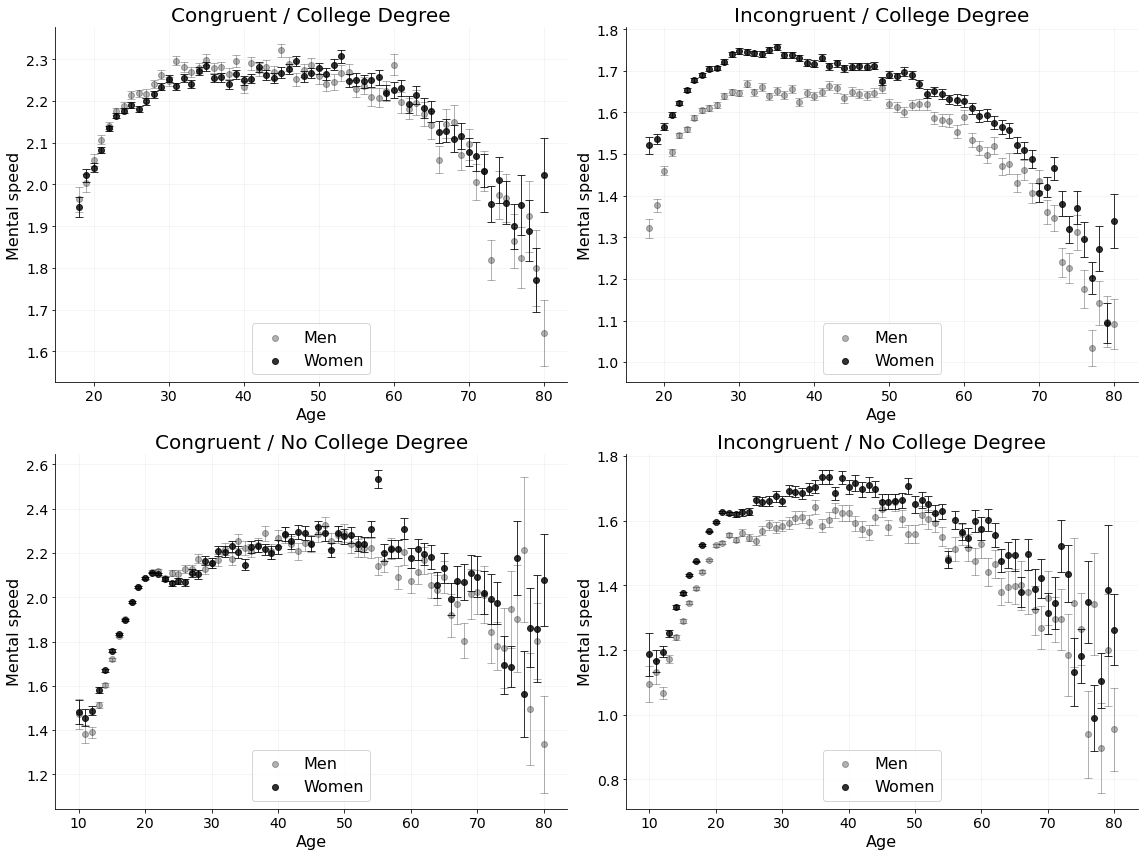

In [9]:
# Remove those with college < 18, most likely bad data
df_grouped['v1_mean'][(df_grouped['age'] < 18) & (df_grouped['college'] == 1)] = np.nan
df_grouped['v2_mean'][(df_grouped['age'] < 18) & (df_grouped['college'] == 1)] = np.nan

# Single-person groups nan
df_grouped['v1_mean'][df_grouped['v1_sem'].isnull()] = np.nan
df_grouped['v2_mean'][df_grouped['v2_sem'].isnull()] = np.nan

f, axarr = plt.subplots(2, 2, figsize=(16, 12))


titles = ['Congruent / College Degree', 'Incongruent / College Degree', 
          'Congruent / No College Degree','Incongruent / No College Degree' ]

# Plot incongruent, no college
to_plot = df_grouped
to_plot = to_plot[to_plot['college'] == 0]
to_plot_m = to_plot[to_plot['birthsex'] == 1.0][['age', 'v1_mean', 'v1_sem']]
to_plot_f = to_plot[to_plot['birthsex'] == 2.0][['age', 'v1_mean', 'v1_sem']]


axarr[1, 1].scatter(to_plot_m['age'], to_plot_m['v1_mean'], color='black', marker='o', alpha=0.3, label='Men')
axarr[1, 1].scatter(to_plot_f['age'], to_plot_f['v1_mean'], color='black', marker='o', alpha=0.8, label='Women')
axarr[1, 1].legend(loc='lower center', fontsize=16)
axarr[1, 1].errorbar(to_plot_m['age'], to_plot_m['v1_mean'], to_plot_m['v1_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[1, 1].errorbar(to_plot_f['age'], to_plot_f['v1_mean'], to_plot_f['v1_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.8, linewidth=1)


# Plot incongruent, college
to_plot = df_grouped
to_plot = to_plot[to_plot['college'] == 1]
to_plot_m = to_plot[to_plot['birthsex'] == 1.0][['age', 'v1_mean', 'v1_sem']]
to_plot_f = to_plot[to_plot['birthsex'] == 2.0][['age', 'v1_mean', 'v1_sem']]

axarr[0, 1].scatter(to_plot_m['age'], to_plot_m['v1_mean'], color='black', marker='o', alpha=0.3, label='Men')
axarr[0, 1].scatter(to_plot_f['age'], to_plot_f['v1_mean'], color='black', marker='o', alpha=0.8, label='Women')
axarr[0, 1].legend(loc='lower center', fontsize=16)
axarr[0, 1].errorbar(to_plot_m['age'], to_plot_m['v1_mean'], to_plot_m['v1_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[0, 1].errorbar(to_plot_f['age'], to_plot_f['v1_mean'], to_plot_f['v1_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.8, linewidth=1)

# Plot congruent, no college
to_plot = df_grouped
to_plot = to_plot[to_plot['college'] == 0]
to_plot_m = to_plot[to_plot['birthsex'] == 1.0][['age', 'v2_mean', 'v2_sem']]
to_plot_f = to_plot[to_plot['birthsex'] == 2.0][['age', 'v2_mean', 'v2_sem']]

axarr[1, 0].scatter(to_plot_m['age'], to_plot_m['v2_mean'], color='black', marker='o', alpha=0.3, label='Men')
axarr[1, 0].scatter(to_plot_f['age'], to_plot_f['v2_mean'], color='black', marker='o', alpha=0.8, label='Women')
axarr[1, 0].legend(loc='lower center', fontsize=16)
axarr[1, 0].errorbar(to_plot_m['age'], to_plot_m['v2_mean'], to_plot_m['v2_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[1, 0].errorbar(to_plot_f['age'], to_plot_f['v2_mean'], to_plot_f['v2_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.8, linewidth=1)

# Plot congruent, college
to_plot = df_grouped
to_plot = to_plot[to_plot['college'] == 1]
to_plot_m = to_plot[to_plot['birthsex'] == 1.0][['age', 'v2_mean', 'v2_sem']]
to_plot_f = to_plot[to_plot['birthsex'] == 2.0][['age', 'v2_mean', 'v2_sem']]

axarr[0, 0].scatter(to_plot_m['age'], to_plot_m['v2_mean'], color='black', marker='o', alpha=0.3, label='Men')
axarr[0, 0].scatter(to_plot_f['age'], to_plot_f['v2_mean'], color='black', marker='o', alpha=0.8, label='Women')
axarr[0, 0].legend(loc='lower center', fontsize=16)
axarr[0, 0].errorbar(to_plot_m['age'], to_plot_m['v2_mean'], to_plot_m['v2_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[0, 0].errorbar(to_plot_f['age'], to_plot_f['v2_mean'], to_plot_f['v2_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.8, linewidth=1)


for i, ax in enumerate(axarr.flat):
    sns.despine(ax=ax)
    ax.set_title(titles[i], fontsize=20)
    ax.set_ylabel('Mental speed', fontsize=16)
    ax.set_xlabel('Age', fontsize=16)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.grid(alpha=0.15)
#     if i < 2:
#         ax.set_ylim([0.6, 2.0])
#     else:
#         ax.set_ylim([1.0, 4.5])
f.tight_layout()
f.savefig('Robustness.png', dpi=300)

# Plot of 4 subgroups

In [10]:
# plot of 4 subgroups

# create sub-samples (3* 300,000 people, one containing the rest)

df_shuffled=df.sample(frac=1).reset_index(drop=True)
df_1 = df_shuffled.iloc[:300000,:]

df_1 = df_1.groupby('age').agg(['mean','sem'])
df_1 = df_1.iloc[:, [0,1,2,3]]
df_1.columns =df_1.columns.to_flat_index().map(lambda x: '_'.join(x))
df_1['age'] = df_1.index

df_2 = df_shuffled.iloc[300000:600000,:]
df_2 = df_2.groupby('age').agg(['mean','sem'])
df_2 = df_2.iloc[:, [0,1,2,3]]
df_2.columns =df_2.columns.to_flat_index().map(lambda x: '_'.join(x))
df_2['age'] = df_1.index

df_3 = df_shuffled.iloc[600000:900000,:]
df_3 = df_3.groupby('age').agg(['mean','sem'])
df_3 = df_3.iloc[:, [0,1,2,3]]
df_3.columns =df_3.columns.to_flat_index().map(lambda x: '_'.join(x))
df_3['age'] = df_1.index

df_4 = df_shuffled.iloc[900000:,:]
df_4 = df_4.groupby('age').agg(['mean','sem'])
df_4 = df_4.iloc[:, [0,1,2,3]]
df_4.columns =df_4.columns.to_flat_index().map(lambda x: '_'.join(x))
df_4['age'] = df_1.index


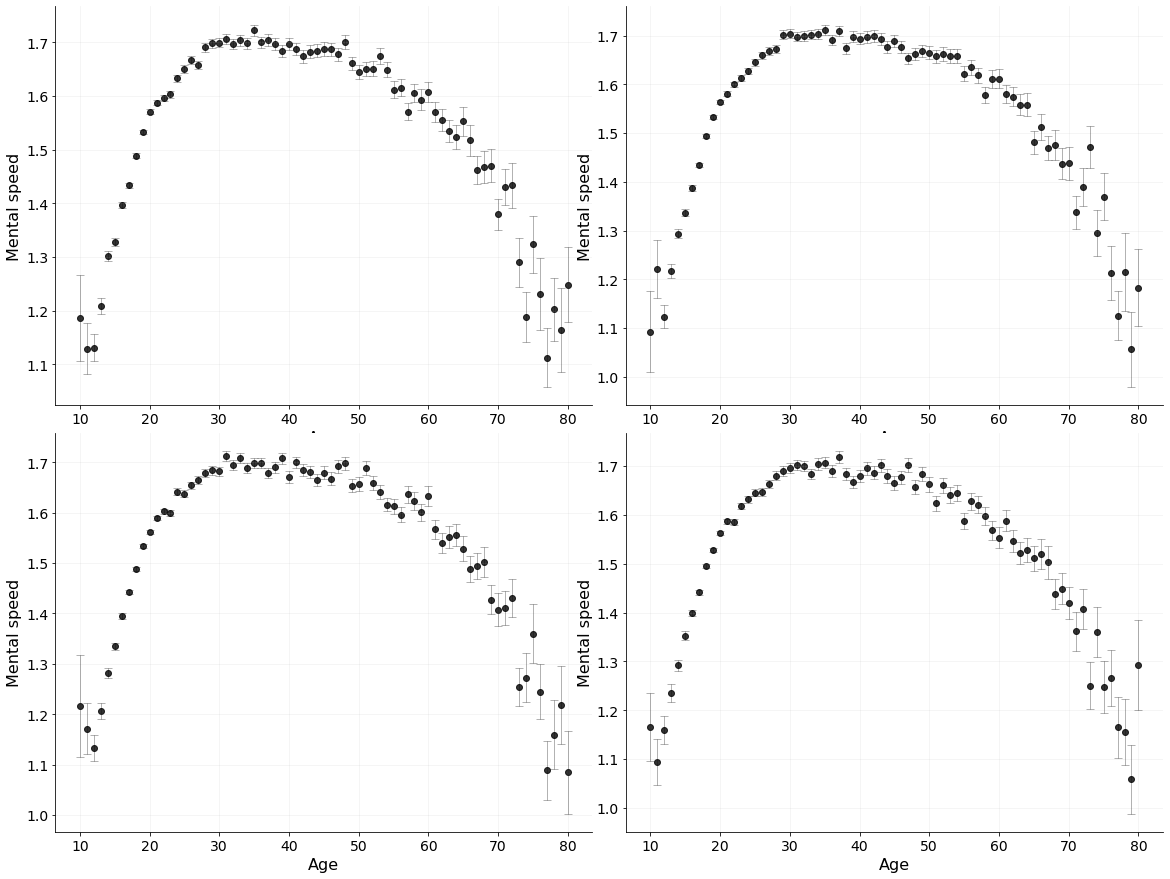

In [11]:
# Create subsample plots
# 4 subsamples, incongruent

f, axarr = plt.subplots(2, 2, figsize=(16, 12))

axarr[0, 0].scatter(df_1['age'], df_1['v1_mean'], color='black', marker='o', alpha=.8)
axarr[0, 0].errorbar(df_1['age'], df_1['v1_mean'], df_1['v1_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)

axarr[0, 1].scatter(df_2['age'], df_2['v1_mean'], color='black', marker='o', alpha=.8)
axarr[0, 1].errorbar(df_2['age'], df_2['v1_mean'], df_2['v1_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)

axarr[1, 0].scatter(df_3['age'], df_3['v1_mean'], color='black', marker='o', alpha=.8)
axarr[1, 0].errorbar(df_3['age'], df_3['v1_mean'], df_3['v1_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)

axarr[1, 1].scatter(df_4['age'], df_4['v1_mean'], color='black', marker='o', alpha=.8)
axarr[1, 1].errorbar(df_4['age'], df_4['v1_mean'], df_4['v1_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)

f.tight_layout()

for i, ax in enumerate(axarr.flat):
    sns.despine(ax=ax)
    ax.set_ylabel('Mental speed', fontsize=16)
    ax.set_xlabel('Age', fontsize=16)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.grid(alpha=0.15)
    
f.savefig('foursubsamples_incongruent.png', dpi=300)


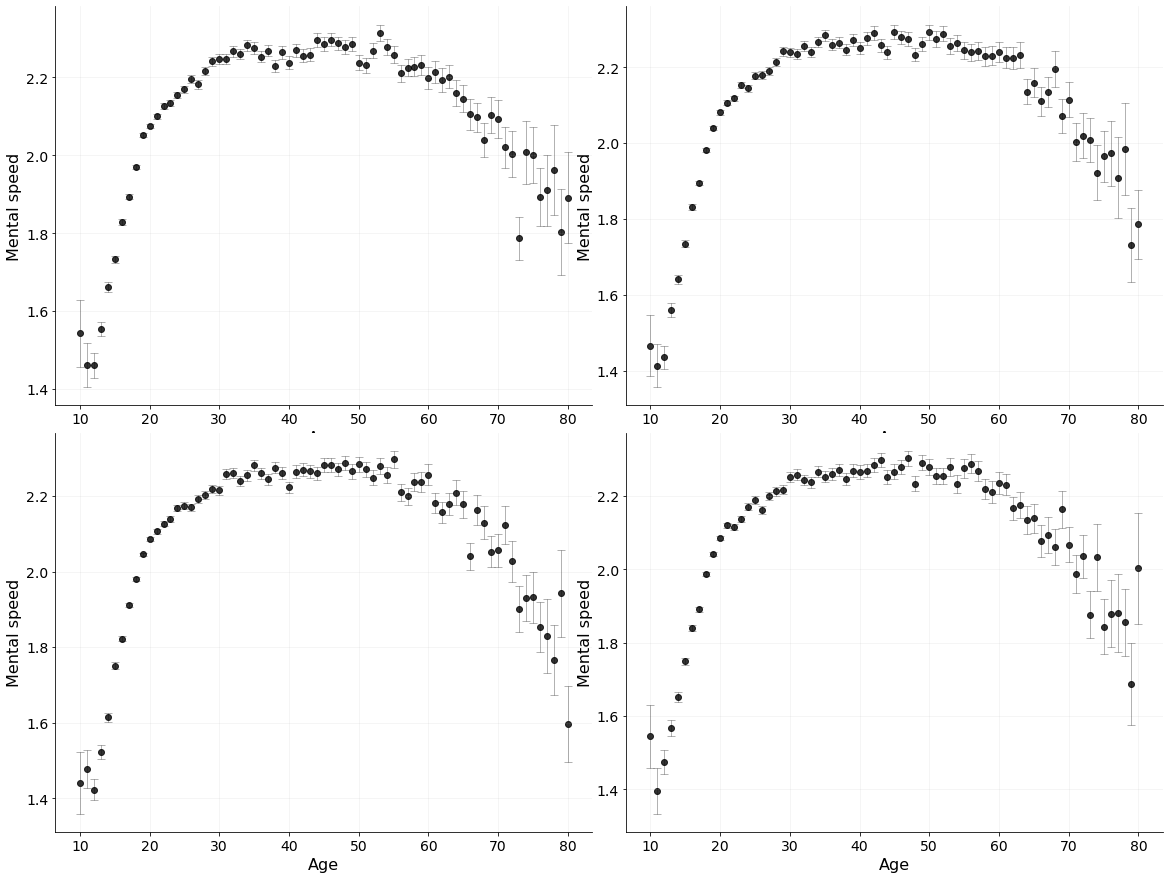

In [12]:
# 4 subsamples, congruent

f, axarr = plt.subplots(2, 2, figsize=(16, 12))

axarr[0, 0].scatter(df_1['age'], df_1['v2_mean'], color='black', marker='o', alpha=.8)
axarr[0, 0].errorbar(df_1['age'], df_1['v2_mean'], df_1['v2_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)

axarr[0, 1].scatter(df_2['age'], df_2['v2_mean'], color='black', marker='o', alpha=.8)
axarr[0, 1].errorbar(df_2['age'], df_2['v2_mean'], df_2['v2_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)

axarr[1, 0].scatter(df_3['age'], df_3['v2_mean'], color='black', marker='o', alpha=.8)
axarr[1, 0].errorbar(df_3['age'], df_3['v2_mean'], df_3['v2_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)

axarr[1, 1].scatter(df_4['age'], df_4['v2_mean'], color='black', marker='o', alpha=.8)
axarr[1, 1].errorbar(df_4['age'], df_4['v2_mean'], df_4['v2_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)

f.tight_layout()

for i, ax in enumerate(axarr.flat):
    sns.despine(ax=ax)
    ax.set_ylabel('Mental speed', fontsize=16)
    ax.set_xlabel('Age', fontsize=16)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.grid(alpha=0.15)
    
f.savefig('foursubsamples_congruent.png', dpi=300)

# USA vs rest of the world plot

In [13]:
# Aggregate and format data

df_usa = df.groupby(['age', 'usa']).agg(['mean','sem'])
df_usa = df_usa.iloc[:, [0,1,2,3,]]
df_usa.columns =df_usa.columns.to_flat_index().map(lambda x: '_'.join(x))
df_usa.reset_index(level=['age', 'usa'], inplace=True)

to_plot_usa_true = df_usa[df_usa['usa'] == 1.0][['age', 'v1_mean', 'v1_sem', 'v2_mean', 'v2_sem']]
to_plot_usa_false = df_usa[df_usa['usa'] == 0][['age', 'v1_mean', 'v1_sem', 'v2_mean', 'v2_sem']]


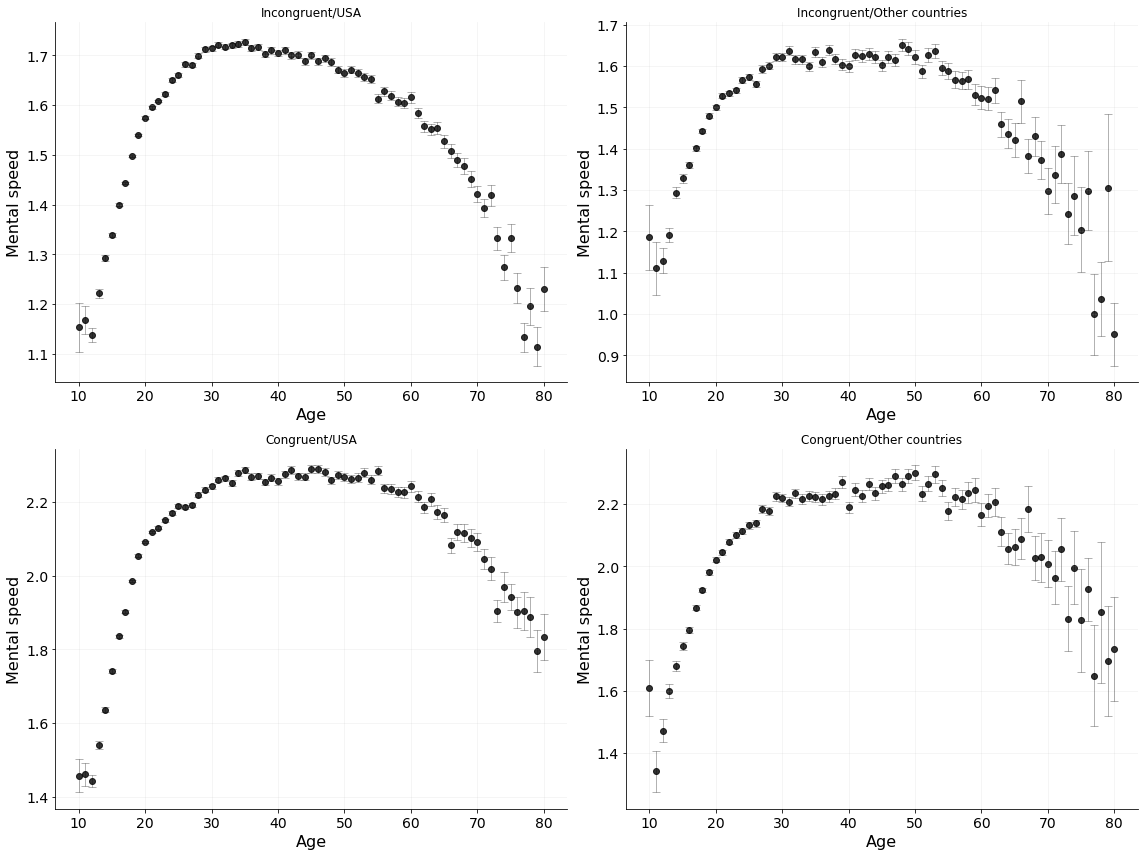

In [14]:
# Create plots

f, axarr = plt.subplots(2, 2, figsize=(16, 12))

axarr[0, 0].scatter(to_plot_usa_true['age'], to_plot_usa_true['v1_mean'], color='black', marker='o', alpha=.8)
axarr[0, 0].errorbar(to_plot_usa_true['age'], to_plot_usa_true['v1_mean'], to_plot_usa_true['v1_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[0,0].set_title('Incongruent/USA')

axarr[0, 1].scatter(to_plot_usa_false['age'], to_plot_usa_false['v1_mean'], color='black', marker='o', alpha=.8)
axarr[0, 1].errorbar(to_plot_usa_false['age'], to_plot_usa_false['v1_mean'], to_plot_usa_false['v1_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[0,1].set_title('Incongruent/Other countries')

axarr[1, 0].scatter(to_plot_usa_true['age'], to_plot_usa_true['v2_mean'], color='black', marker='o', alpha=.8)
axarr[1, 0].errorbar(to_plot_usa_true['age'], to_plot_usa_true['v2_mean'], to_plot_usa_true['v2_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[1,0].set_title('Congruent/USA')

axarr[1, 1].scatter(to_plot_usa_false['age'], to_plot_usa_false['v2_mean'], color='black', marker='o', alpha=.8)
axarr[1, 1].errorbar(to_plot_usa_false['age'], to_plot_usa_false['v2_mean'], to_plot_usa_false['v2_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[1,1].set_title('Congruent/Other countries')


for i, ax in enumerate(axarr.flat):
    sns.despine(ax=ax)
    ax.set_ylabel('Mental speed', fontsize=16)
    ax.set_xlabel('Age', fontsize=16)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.grid(alpha=0.15)
    
f.tight_layout()

    
f.savefig('usa_notusa.png', dpi=300)

# Stimulus types plot

In [15]:
# Aggregate and format data

df_stim = df.groupby(['age', 'stimulus']).agg(['mean','sem'])
df_stim = df_stim.iloc[:, [0,1,2,3,]]
df_stim.columns =df_stim.columns.to_flat_index().map(lambda x: '_'.join(x))
df_stim.reset_index(level=['age', 'stimulus'], inplace=True)

to_plot_stim_true = df_usa[df_stim['stimulus'] == 1.0][['age', 'v1_mean', 'v1_sem', 'v2_mean', 'v2_sem']]
to_plot_stim_false = df_usa[df_stim['stimulus'] == 0][['age', 'v1_mean', 'v1_sem', 'v2_mean', 'v2_sem']]


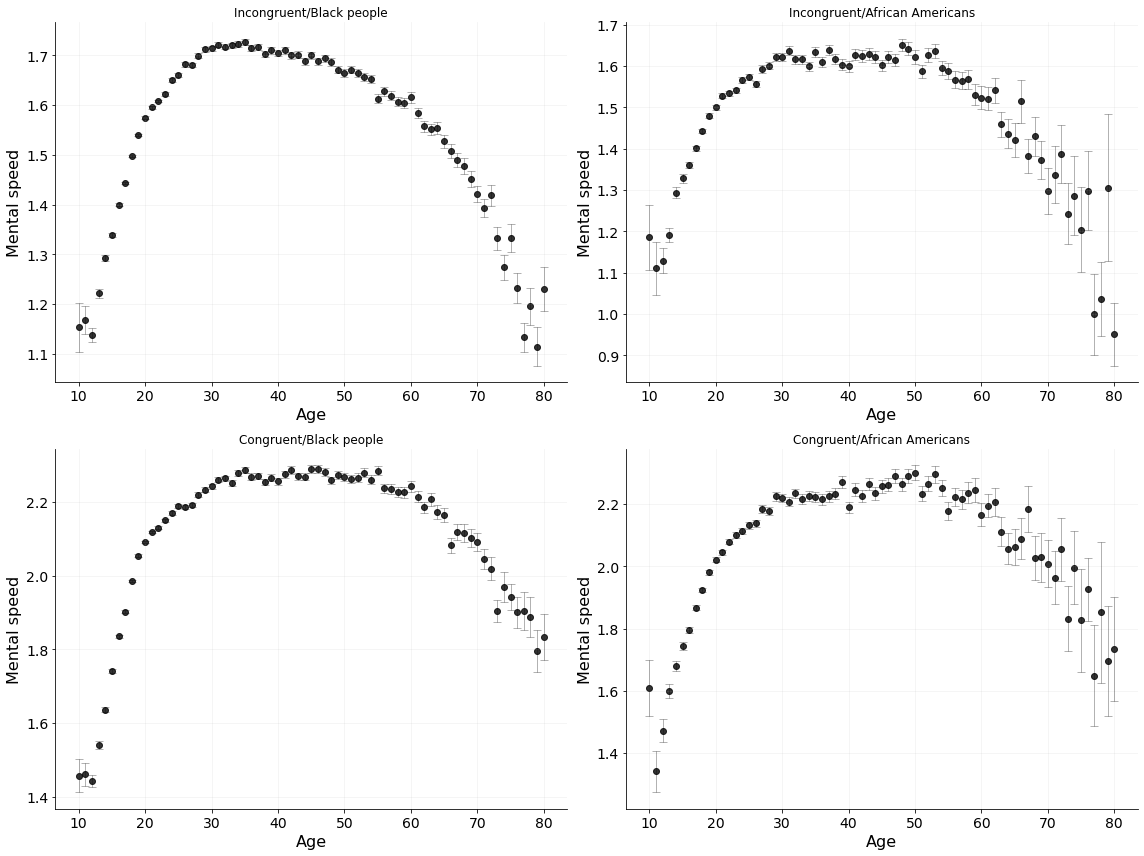

In [16]:
# Create plots

f, axarr = plt.subplots(2, 2, figsize=(16, 12))

axarr[0, 0].scatter(to_plot_stim_true['age'], to_plot_stim_true['v1_mean'], color='black', marker='o', alpha=.8)
axarr[0, 0].errorbar(to_plot_stim_true['age'], to_plot_stim_true['v1_mean'], to_plot_stim_true['v1_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[0,0].set_title('Incongruent/Black people')

axarr[0, 1].scatter(to_plot_stim_false['age'], to_plot_stim_false['v1_mean'], color='black', marker='o', alpha=.8)
axarr[0, 1].errorbar(to_plot_stim_false['age'], to_plot_stim_false['v1_mean'], to_plot_stim_false['v1_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[0,1].set_title('Incongruent/African Americans')


axarr[1, 0].scatter(to_plot_stim_true['age'], to_plot_stim_true['v2_mean'], color='black', marker='o', alpha=.8)
axarr[1, 0].errorbar(to_plot_stim_true['age'], to_plot_stim_true['v2_mean'], to_plot_stim_true['v2_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[1,0].set_title('Congruent/Black people')


axarr[1, 1].scatter(to_plot_stim_false['age'], to_plot_stim_false['v2_mean'], color='black', marker='o', alpha=.8)
axarr[1, 1].errorbar(to_plot_stim_false['age'], to_plot_stim_false['v2_mean'], to_plot_stim_false['v2_sem'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[1,1].set_title('Congruent/African Americans')


for i, ax in enumerate(axarr.flat):
    sns.despine(ax=ax)
    ax.set_ylabel('Mental speed', fontsize=16)
    ax.set_xlabel('Age', fontsize=16)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.grid(alpha=0.15)
    
f.tight_layout()

    
f.savefig('stimulus_type.png', dpi=300)

# Posterior predictive checks

In [27]:
# Diffusion model simulation functions

from numba import njit

@njit
def diffusion_trial(v, a, zr, ndt_c, ndt_w, dt, max_steps):
    """Simulates a trial from the diffusion model."""

    n_steps = 0.
    x = a * zr

    # Simulate a single DM path
    while (x > 0 and x < a and n_steps < max_steps):

        # DDM equation
        x += v*dt + np.sqrt(dt) * np.random.normal()

        # Increment step
        n_steps += 1.0

    rt = n_steps * dt
    return rt + ndt_c if x > 0. else -rt - ndt_w

@njit
def simulate_diffusion_condition(n_trials, v, a, zr, ndt_c, ndt_w, dt=0.001, max_steps=10000):
    """Simulates a diffusion process over an entire condition."""
    
    x = np.empty(n_trials)
    for i in range(n_trials):
        x[i] = diffusion_trial(v, a, zr, ndt_c, ndt_w, dt, max_steps)
    return x


def simulate_diffusion_2_conds(theta, dt=0.001, max_steps=10000):
    """Simulates a diffusion process for 2 conditions with 7 parameters (v1, v2, a1, a2, ndt1, ndt2, zr=0.5)"""
        
    v1, v2, a1, a2, ndt_c, ndt_w = theta
    rt_c1 = simulate_diffusion_condition(60, v1, a1, 0.5, ndt_c, ndt_w, dt, max_steps)
    rt_c2 = simulate_diffusion_condition(60, v2, a2, 0.5, ndt_c, ndt_w, dt, max_steps)
    rts = np.concatenate((rt_c1, rt_c2))
    return rts

In [28]:
# Conduct simple PPC
# Define random seed
random.seed(42)

# Number of people used for ppc
n_people=100000

# Randomly select people for ppc from the entire sample
random_people = random.sample(range(len(df)),n_people)

# Extract quartiles in empirical data
df_ppc = np.array(df)[random_people, 0:6]
emp_q25_c =  np.array(df)[random_people, 51]
emp_q50_c =  np.array(df)[random_people, 53]
emp_q75_c =  np.array(df)[random_people, 55]
emp_q25_e =  np.array(df)[random_people, 57]
emp_q50_e =  np.array(df)[random_people, 59]
emp_q75_e =  np.array(df)[random_people, 61]


# Simulate data from diffusion model parameters
theta= df_ppc
sims = np.apply_along_axis(simulate_diffusion_2_conds, axis=1, arr=theta)


# Extract quartiles in simulated data

correct_sims = copy.copy(sims)
correct_sims[correct_sims[:,:]<=0] = np.nan

error_sims = sims
error_sims[error_sims[:,:]>=0] = np.nan

sim_q75_c = np.nanquantile(correct_sims, 0.75, axis=1)
sim_q50_c = np.nanquantile(correct_sims, 0.5, axis=1)
sim_q25_c = np.nanquantile(correct_sims, 0.25, axis=1)

sim_q75_e = np.nanquantile(np.abs(error_sims), 0.75, axis=1)
sim_q50_e = np.nanquantile(np.abs(error_sims), 0.5, axis=1)
sim_q25_e = np.nanquantile(np.abs(error_sims), 0.25, axis=1)

# Combine emperical and simulated quantiles

empsim_quantiles=np.c_[emp_q25_c, emp_q50_c, emp_q75_c, sim_q25_c,sim_q50_c, sim_q75_c,
                      emp_q25_e, emp_q50_e, emp_q75_e, sim_q25_e,sim_q50_e, sim_q75_e]

C:\Users\User1\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


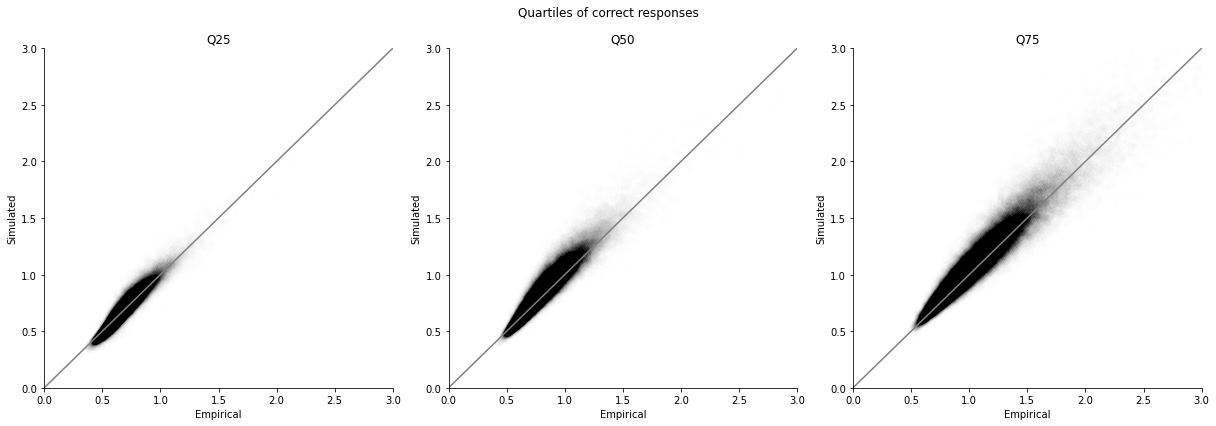

In [29]:
# Correct RT PPC Figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(17,6))

fig.suptitle('Quartiles of correct responses')
ax1.scatter(empsim_quantiles[:,0], empsim_quantiles[:,3], marker='o', color='black', alpha =.005)
ax2.scatter(empsim_quantiles[:,1], empsim_quantiles[:,4], marker='o', color='black', alpha =.005)
ax3.scatter(empsim_quantiles[:,2], empsim_quantiles[:,5], marker='o', color='black', alpha =.005)

ax1.set(xlabel="Empirical", ylabel="Simulated")
ax2.set(xlabel="Empirical", ylabel="Simulated")
ax3.set(xlabel="Empirical", ylabel="Simulated")

ax1.set_title('Q25')
ax2.set_title('Q50')
ax3.set_title('Q75')

ax1.set_xlim(0, 3)
ax1.set_ylim(0, 3)
ax2.set_xlim(0, 3)
ax2.set_ylim(0, 3)
ax3.set_xlim(0, 3)
ax3.set_ylim(0, 3)

ax1.plot([0, 10], [0, 10], color='grey')
ax2.plot([0, 10], [0, 10], color='grey')
ax3.plot([0, 10], [0, 10], color='grey')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

fig.tight_layout()

fig.savefig('PPC_correct.png', dpi=300)

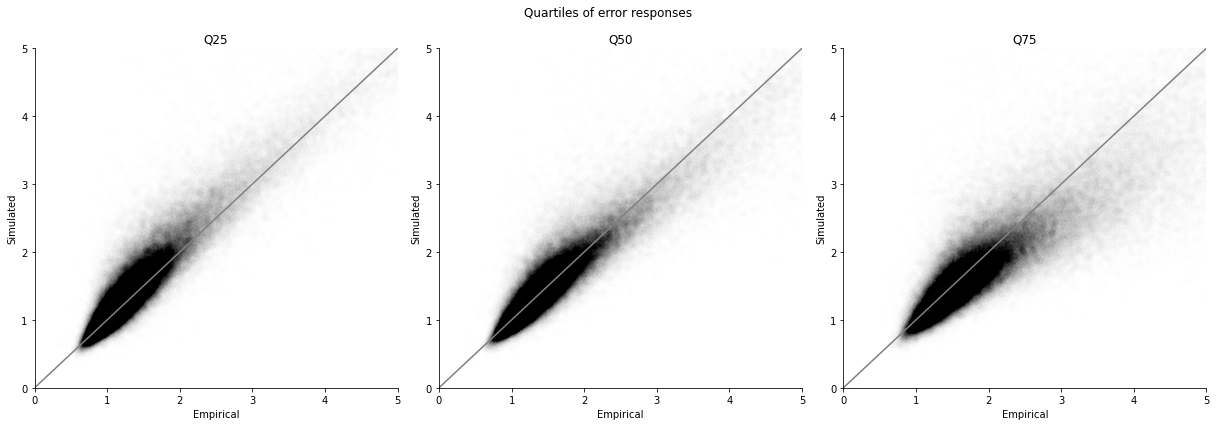

In [30]:
# Error RT PPC Figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(17,6))
fig.suptitle('Quartiles of error responses')
ax1.scatter(empsim_quantiles[:,6], empsim_quantiles[:,9], marker='o', color='black', alpha =.005)
ax2.scatter(empsim_quantiles[:,7], empsim_quantiles[:,10], marker='o', color='black', alpha =.005)
ax3.scatter(empsim_quantiles[:,8], empsim_quantiles[:,11], marker='o', color='black', alpha =.005)

ax1.set(xlabel="Empirical", ylabel="Simulated")
ax2.set(xlabel="Empirical", ylabel="Simulated")
ax3.set(xlabel="Empirical", ylabel="Simulated")

ax1.set_title('Q25')
ax2.set_title('Q50')
ax3.set_title('Q75')

ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

ax1.plot([0, 10], [0, 10], color='grey')
ax2.plot([0, 10], [0, 10], color='grey')
ax3.plot([0, 10], [0, 10], color='grey')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

fig.tight_layout()

fig.savefig('PPC_error.png', dpi=300)